In [ ]:
import os
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
# from sklearn.metrics import adjusted_rand_score
# from sklearn.metrics import adjusted_mutual_info_score as mi
# from sklearn.metrics import homogeneity_score as hs
from sklearn.metrics import confusion_matrix
import matplotlib
import seaborn as sns
from scipy import stats
from imblearn.over_sampling import RandomOverSampler 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.manifold import TSNE


In [ ]:
# Load all required data
from google.colab import drive
drive.mount('/content/gdrive')
% cd '/content/gdrive/MyDrive/Colab Notebooks/Unsupervised'
essayEncode_file = 'essayEncodings.npz'
essayClass_file = 'essayClass.csv'
essayRating_file = 'essayRating.csv'
#os.chdir(npz_loc)

essayEncode = np.load(essayEncode_file)
essayEncode = essayEncode['arr_0']
essayClass = pd.read_csv(essayClass_file)
essayRating = pd.read_csv(essayRating_file)
print(essayEncode.shape)
print(essayClass.shape)
print(essayRating.shape)


Mounted at /content/gdrive
/content/gdrive/MyDrive/Colab Notebooks/Unsupervised
(36765, 7788)
(36765, 1)
(36765, 1)


(36765, 7)
(36765,)
(36765,)


(array([20977.,     0.,     0.,     0.,     0.,  6462.,     0.,     0.,
            0.,  9326.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

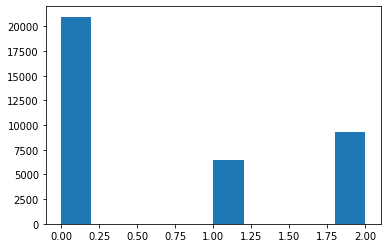

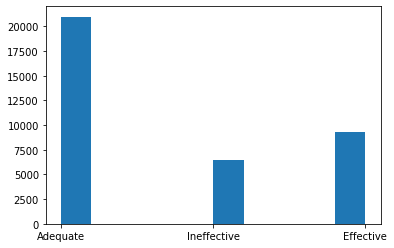

In [ ]:
# Convert categorical variable into dummy variable and one-hot encoding
# For essayClass - we have one-hot vector and dummy variables too. One-hot vector essential for using with PCA
essayClassOneHot = pd.get_dummies(essayClass.discourse_type).to_numpy()
essayClassDummies = pd.factorize(essayClass.discourse_type)
essayClassDummies = essayClassDummies[0]
# For essayRating - only dummy variable are considered because we only use it for comparision and not for PCA
essayRatingDummies = pd.factorize(essayRating.discourse_effectiveness)
essayRatingDummies = essayRatingDummies[0]
print(essayClassOneHot.shape)
print(essayClassDummies.shape)
print(essayRatingDummies.shape)
plt.hist(essayRatingDummies)
plt.figure()
plt.hist(essayRating.discourse_effectiveness)

In [ ]:
# Train-validation data split
X_train, X_test, y_train, y_test = train_test_split(np.concatenate((essayEncode,essayClassOneHot),axis=1),
                                                    essayRatingDummies, test_size=0.2, random_state=42, shuffle = True)
print(X_train.shape)
# Over-sample training data to make it balanced
ros = RandomOverSampler(random_state=42)
X_train, y_train = ros.fit_resample(X_train, y_train)
# X_res, y_res = ros.fit_resample(np.concatenate((essayEncode,essayClassOneHot),axis=1), essayRatingDummies)
# X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42, shuffle = True)

(29412, 7795)


(array([16731.,     0.,     0.,     0.,     0., 16731.,     0.,     0.,
            0., 16731.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

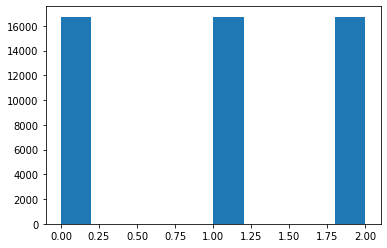

In [ ]:
plt.hist(y_train)

In [ ]:
print(X_train.shape)
print(X_test.shape)
X_super=np.concatenate((X_train, X_test), axis=0)
#Y_super=np.concatenate((y_train, y_test), axis=0)
print(X_super.shape)



(50193, 7795)
(7353, 7795)
(57546, 7795)


In [ ]:
# t-SNE on training data
tsne = TSNE(n_components=3, verbose=1)#,perplexity=10,metric = 'cityblock')
xTSNE = tsne.fit_transform(X_super)
xTSNE.shape


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 57546 samples in 0.458s...
[t-SNE] Computed neighbors for 57546 samples in 1621.160s...
[t-SNE] Computed conditional probabilities for sample 1000 / 57546
[t-SNE] Computed conditional probabilities for sample 2000 / 57546
[t-SNE] Computed conditional probabilities for sample 3000 / 57546
[t-SNE] Computed conditional probabilities for sample 4000 / 57546
[t-SNE] Computed conditional probabilities for sample 5000 / 57546
[t-SNE] Computed conditional probabilities for sample 6000 / 57546
[t-SNE] Computed conditional probabilities for sample 7000 / 57546
[t-SNE] Computed conditional probabilities for sample 8000 / 57546
[t-SNE] Computed conditional probabilities for sample 9000 / 57546
[t-SNE] Computed conditional probabilities for sample 10000 / 57546
[t-SNE] Computed conditional probabilities for sample 11000 / 57546
[t-SNE] Computed conditional probabilities for sample 12000 / 57546
[t-SNE] Computed conditional probabilities for 

(57546, 3)

In [ ]:
xTSNE_train, xTSNE_test = train_test_split(xTSNE, test_size=0.127776040037,shuffle = False)
#x_train, x_test = train_test_split(X_super, test_size=0.127776040037)
#Y_train, Y_test = train_test_split(Y_super, test_size=0.127776040037)


In [ ]:
print(xTSNE_train.shape)
print(xTSNE_test.shape)

(50193, 3)
(7353, 3)


In [ ]:
# PCA for for testing data
# K-Means on PCA-reduced data
kmeans = KMeans(n_clusters=3, random_state=0)
xLabs = kmeans.fit_predict(xTSNE_train)
xLabs_Test = kmeans.predict(xTSNE_test)
nLabs = np.unique(xLabs)
yPred = np.zeros(xLabs.shape[0])
yPred_Test = np.zeros(xLabs_Test.shape[0])
# Assign label to each cluster
for lab in nLabs:
    inds = np.where(xLabs==lab)[0]
    inds_test = np.where(xLabs_Test==lab)[0]
    trueLabels = y_train[inds]
    clusterLabel = stats.mode(trueLabels)[0]
    yPred[inds] = clusterLabel
#     print(clusterLabel)
    yPred_Test[inds_test] = clusterLabel
print(100*sum(yPred == y_train)/len(yPred))
print('Training: Metrics with oversampling')
print(classification_report(y_train,yPred,target_names=['Adequate','Inadequate','Effective']))
print('Validation: Metrics with no oversampling')
print(classification_report(y_test,yPred_Test,target_names=['Adequate','Inadequate','Effective']))

# Remove duplicates arising from oversampling in training data
dfTrain = np.concatenate((xTSNE_train,yPred[:,np.newaxis],y_train[:,np.newaxis]),axis = 1)
dfTest = np.concatenate((xTSNE_test,yPred_Test[:,np.newaxis],y_test[:,np.newaxis]),axis = 1)
dfTrain = pd.DataFrame(dfTrain)
dfTest = pd.DataFrame(dfTest)
print('Train data before removing duplicates')
print(dfTrain.shape)
# print(dfTest.shape)
dfTrain.drop_duplicates(inplace=True)
# dfTest.drop_duplicates(inplace=True)
print('Train data after removing duplicates')
print(dfTrain.shape)
# print(dfTest.shape)
print('Training: Metrics with duplicates removed')
print(classification_report(dfTrain.iloc[:,-1],dfTrain.iloc[:,-2],target_names=['Adequate','Inadequate','Effective']))
print('Validation: Metrics with no oversampling')
print(classification_report(dfTest.iloc[:,-1],dfTest.iloc[:,-2],target_names=['Adequate','Inadequate','Effective']))
print('Confusion matrix - validation')
print(confusion_matrix(dfTest.iloc[:,-1],dfTest.iloc[:,-2]))
print('Confusion matrix - training')
print(confusion_matrix(dfTrain.iloc[:,-1],dfTrain.iloc[:,-2]))


39.63102424640886
Training: Metrics with oversampling
              precision    recall  f1-score   support

    Adequate       0.00      0.00      0.00     16731
  Inadequate       0.45      0.44      0.45     16731
   Effective       0.37      0.75      0.49     16731

    accuracy                           0.40     50193
   macro avg       0.27      0.40      0.31     50193
weighted avg       0.27      0.40      0.31     50193

Validation: Metrics with no oversampling
              precision    recall  f1-score   support

    Adequate       0.00      0.00      0.00      4246
  Inadequate       0.25      0.44      0.32      1282
   Effective       0.27      0.77      0.40      1825

    accuracy                           0.27      7353
   macro avg       0.18      0.40      0.24      7353
weighted avg       0.11      0.27      0.16      7353

Train data before removing duplicates
(50193, 5)
Train data after removing duplicates
(38100, 5)
Training: Metrics with duplicates removed


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

              precision    recall  f1-score   support

    Adequate       0.00      0.00      0.00     16634
  Inadequate       0.38      0.45      0.41     10086
   Effective       0.33      0.75      0.46     11380

    accuracy                           0.34     38100
   macro avg       0.23      0.40      0.29     38100
weighted avg       0.20      0.34      0.24     38100

Validation: Metrics with no oversampling
              precision    recall  f1-score   support

    Adequate       0.00      0.00      0.00      4246
  Inadequate       0.25      0.44      0.32      1282
   Effective       0.27      0.77      0.40      1825

    accuracy                           0.27      7353
   macro avg       0.18      0.40      0.24      7353
weighted avg       0.11      0.27      0.16      7353

Confusion matrix - validation
[[   0 1231 3015]
 [   0  565  717]
 [   0  425 1400]]
Confusion matrix - training
[[    0  4656 11978]
 [    0  4532  5554]
 [    0  2861  8519]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

In [ ]:
# PCA for for testing data
# K-Means on PCA-reduced data
kmeans = KMeans(n_clusters=5, random_state=0)
xLabs = kmeans.fit_predict(xTSNE_train)
xLabs_Test = kmeans.predict(xTSNE_test)
nLabs = np.unique(xLabs)
yPred = np.zeros(xLabs.shape[0])
yPred_Test = np.zeros(xLabs_Test.shape[0])
# Assign label to each cluster
for lab in nLabs:
    inds = np.where(xLabs==lab)[0]
    inds_test = np.where(xLabs_Test==lab)[0]
    trueLabels = y_train[inds]
    clusterLabel = stats.mode(trueLabels)[0]
    yPred[inds] = clusterLabel
#     print(clusterLabel)
    yPred_Test[inds_test] = clusterLabel
print(100*sum(yPred == y_train)/len(yPred))
print('Training: Metrics with oversampling')
print(classification_report(y_train,yPred,target_names=['Adequate','Inadequate','Effective']))
print('Validation: Metrics with no oversampling')
print(classification_report(y_test,yPred_Test,target_names=['Adequate','Inadequate','Effective']))

# Remove duplicates arising from oversampling in training data
dfTrain = np.concatenate((xTSNE_train,yPred[:,np.newaxis],y_train[:,np.newaxis]),axis = 1)
dfTest = np.concatenate((xTSNE_test,yPred_Test[:,np.newaxis],y_test[:,np.newaxis]),axis = 1)
dfTrain = pd.DataFrame(dfTrain)
dfTest = pd.DataFrame(dfTest)
print('Train data before removing duplicates')
print(dfTrain.shape)
# print(dfTest.shape)
dfTrain.drop_duplicates(inplace=True)
# dfTest.drop_duplicates(inplace=True)
print('Train data after removing duplicates')
print(dfTrain.shape)
# print(dfTest.shape)
print('Training: Metrics with duplicates removed')
print(classification_report(dfTrain.iloc[:,-1],dfTrain.iloc[:,-2],target_names=['Adequate','Inadequate','Effective']))
print('Validation: Metrics with no oversampling')
print(classification_report(dfTest.iloc[:,-1],dfTest.iloc[:,-2],target_names=['Adequate','Inadequate','Effective']))
print('Confusion matrix - validation')
print(confusion_matrix(dfTest.iloc[:,-1],dfTest.iloc[:,-2]))
print('Confusion matrix - training')
print(confusion_matrix(dfTrain.iloc[:,-1],dfTrain.iloc[:,-2]))


39.15286992210069
Training: Metrics with oversampling
              precision    recall  f1-score   support

    Adequate       0.41      0.23      0.29     16731
  Inadequate       0.39      0.69      0.50     16731
   Effective       0.38      0.26      0.31     16731

    accuracy                           0.39     50193
   macro avg       0.39      0.39      0.37     50193
weighted avg       0.39      0.39      0.37     50193

Validation: Metrics with no oversampling
              precision    recall  f1-score   support

    Adequate       0.61      0.21      0.32      4246
  Inadequate       0.21      0.70      0.32      1282
   Effective       0.28      0.25      0.26      1825

    accuracy                           0.31      7353
   macro avg       0.37      0.39      0.30      7353
weighted avg       0.46      0.31      0.30      7353

Train data before removing duplicates
(50193, 5)
Train data after removing duplicates
(38100, 5)
Training: Metrics with duplicates removed
    

In [ ]:
# PCA for for testing data
# K-Means on PCA-reduced data
kmeans = KMeans(n_clusters=10, random_state=0)
xLabs = kmeans.fit_predict(xTSNE_train)
xLabs_Test = kmeans.predict(xTSNE_test)
nLabs = np.unique(xLabs)
yPred = np.zeros(xLabs.shape[0])
yPred_Test = np.zeros(xLabs_Test.shape[0])
# Assign label to each cluster
for lab in nLabs:
    inds = np.where(xLabs==lab)[0]
    inds_test = np.where(xLabs_Test==lab)[0]
    trueLabels = y_train[inds]
    clusterLabel = stats.mode(trueLabels)[0]
    yPred[inds] = clusterLabel
#     print(clusterLabel)
    yPred_Test[inds_test] = clusterLabel
print(100*sum(yPred == y_train)/len(yPred))
print('Training: Metrics with oversampling')
print(classification_report(y_train,yPred,target_names=['Adequate','Inadequate','Effective']))
print('Validation: Metrics with no oversampling')
print(classification_report(y_test,yPred_Test,target_names=['Adequate','Inadequate','Effective']))

# Remove duplicates arising from oversampling in training data
dfTrain = np.concatenate((xTSNE_train,yPred[:,np.newaxis],y_train[:,np.newaxis]),axis = 1)
dfTest = np.concatenate((xTSNE_test,yPred_Test[:,np.newaxis],y_test[:,np.newaxis]),axis = 1)
dfTrain = pd.DataFrame(dfTrain)
dfTest = pd.DataFrame(dfTest)
print('Train data before removing duplicates')
print(dfTrain.shape)
# print(dfTest.shape)
dfTrain.drop_duplicates(inplace=True)
# dfTest.drop_duplicates(inplace=True)
print('Train data after removing duplicates')
print(dfTrain.shape)
# print(dfTest.shape)
print('Training: Metrics with duplicates removed')
print(classification_report(dfTrain.iloc[:,-1],dfTrain.iloc[:,-2],target_names=['Adequate','Inadequate','Effective']))
print('Validation: Metrics with no oversampling')
print(classification_report(dfTest.iloc[:,-1],dfTest.iloc[:,-2],target_names=['Adequate','Inadequate','Effective']))
print('Confusion matrix - validation')
print(confusion_matrix(dfTest.iloc[:,-1],dfTest.iloc[:,-2]))
print('Confusion matrix - training')
print(confusion_matrix(dfTrain.iloc[:,-1],dfTrain.iloc[:,-2]))


42.824696670850514
Training: Metrics with oversampling
              precision    recall  f1-score   support

    Adequate       0.39      0.48      0.43     16731
  Inadequate       0.49      0.45      0.47     16731
   Effective       0.42      0.35      0.38     16731

    accuracy                           0.43     50193
   macro avg       0.43      0.43      0.43     50193
weighted avg       0.43      0.43      0.43     50193

Validation: Metrics with no oversampling
              precision    recall  f1-score   support

    Adequate       0.62      0.47      0.54      4246
  Inadequate       0.28      0.46      0.35      1282
   Effective       0.30      0.33      0.31      1825

    accuracy                           0.43      7353
   macro avg       0.40      0.42      0.40      7353
weighted avg       0.48      0.43      0.45      7353

Train data before removing duplicates
(50193, 5)
Train data after removing duplicates
(38100, 5)
Training: Metrics with duplicates removed
   

In [ ]:
# PCA for for testing data
# K-Means on PCA-reduced data
kmeans = KMeans(n_clusters=15, random_state=0)
xLabs = kmeans.fit_predict(xTSNE_train)
xLabs_Test = kmeans.predict(xTSNE_test)
nLabs = np.unique(xLabs)
yPred = np.zeros(xLabs.shape[0])
yPred_Test = np.zeros(xLabs_Test.shape[0])
# Assign label to each cluster
for lab in nLabs:
    inds = np.where(xLabs==lab)[0]
    inds_test = np.where(xLabs_Test==lab)[0]
    trueLabels = y_train[inds]
    clusterLabel = stats.mode(trueLabels)[0]
    yPred[inds] = clusterLabel
#     print(clusterLabel)
    yPred_Test[inds_test] = clusterLabel
print(100*sum(yPred == y_train)/len(yPred))
print('Training: Metrics with oversampling')
print(classification_report(y_train,yPred,target_names=['Adequate','Inadequate','Effective']))
print('Validation: Metrics with no oversampling')
print(classification_report(y_test,yPred_Test,target_names=['Adequate','Inadequate','Effective']))

# Remove duplicates arising from oversampling in training data
dfTrain = np.concatenate((xTSNE_train,yPred[:,np.newaxis],y_train[:,np.newaxis]),axis = 1)
dfTest = np.concatenate((xTSNE_test,yPred_Test[:,np.newaxis],y_test[:,np.newaxis]),axis = 1)
dfTrain = pd.DataFrame(dfTrain)
dfTest = pd.DataFrame(dfTest)
print('Train data before removing duplicates')
print(dfTrain.shape)
# print(dfTest.shape)
dfTrain.drop_duplicates(inplace=True)
# dfTest.drop_duplicates(inplace=True)
print('Train data after removing duplicates')
print(dfTrain.shape)
# print(dfTest.shape)
print('Training: Metrics with duplicates removed')
print(classification_report(dfTrain.iloc[:,-1],dfTrain.iloc[:,-2],target_names=['Adequate','Inadequate','Effective']))
print('Validation: Metrics with no oversampling')
print(classification_report(dfTest.iloc[:,-1],dfTest.iloc[:,-2],target_names=['Adequate','Inadequate','Effective']))
print('Confusion matrix - validation')
print(confusion_matrix(dfTest.iloc[:,-1],dfTest.iloc[:,-2]))
print('Confusion matrix - training')
print(confusion_matrix(dfTrain.iloc[:,-1],dfTrain.iloc[:,-2]))


44.69946008407547
Training: Metrics with oversampling
              precision    recall  f1-score   support

    Adequate       0.43      0.29      0.35     16731
  Inadequate       0.47      0.50      0.49     16731
   Effective       0.43      0.55      0.49     16731

    accuracy                           0.45     50193
   macro avg       0.45      0.45      0.44     50193
weighted avg       0.45      0.45      0.44     50193

Validation: Metrics with no oversampling
              precision    recall  f1-score   support

    Adequate       0.64      0.29      0.40      4246
  Inadequate       0.26      0.49      0.34      1282
   Effective       0.31      0.53      0.39      1825

    accuracy                           0.38      7353
   macro avg       0.41      0.44      0.38      7353
weighted avg       0.50      0.38      0.39      7353

Train data before removing duplicates
(50193, 5)
Train data after removing duplicates
(38100, 5)
Training: Metrics with duplicates removed
    

In [ ]:
# PCA for for testing data
# K-Means on PCA-reduced data
kmeans = KMeans(n_clusters=25, random_state=0)
xLabs = kmeans.fit_predict(xTSNE_train)
xLabs_Test = kmeans.predict(xTSNE_test)
nLabs = np.unique(xLabs)
yPred = np.zeros(xLabs.shape[0])
yPred_Test = np.zeros(xLabs_Test.shape[0])
# Assign label to each cluster
for lab in nLabs:
    inds = np.where(xLabs==lab)[0]
    inds_test = np.where(xLabs_Test==lab)[0]
    trueLabels = y_train[inds]
    clusterLabel = stats.mode(trueLabels)[0]
    yPred[inds] = clusterLabel
#     print(clusterLabel)
    yPred_Test[inds_test] = clusterLabel
print(100*sum(yPred == y_train)/len(yPred))
print('Training: Metrics with oversampling')
print(classification_report(y_train,yPred,target_names=['Adequate','Inadequate','Effective']))
print('Validation: Metrics with no oversampling')
print(classification_report(y_test,yPred_Test,target_names=['Adequate','Inadequate','Effective']))

# Remove duplicates arising from oversampling in training data
dfTrain = np.concatenate((xTSNE_train,yPred[:,np.newaxis],y_train[:,np.newaxis]),axis = 1)
dfTest = np.concatenate((xTSNE_test,yPred_Test[:,np.newaxis],y_test[:,np.newaxis]),axis = 1)
dfTrain = pd.DataFrame(dfTrain)
dfTest = pd.DataFrame(dfTest)
print('Train data before removing duplicates')
print(dfTrain.shape)
# print(dfTest.shape)
dfTrain.drop_duplicates(inplace=True)
# dfTest.drop_duplicates(inplace=True)
print('Train data after removing duplicates')
print(dfTrain.shape)
# print(dfTest.shape)
print('Training: Metrics with duplicates removed')
print(classification_report(dfTrain.iloc[:,-1],dfTrain.iloc[:,-2],target_names=['Adequate','Inadequate','Effective']))
print('Validation: Metrics with no oversampling')
print(classification_report(dfTest.iloc[:,-1],dfTest.iloc[:,-2],target_names=['Adequate','Inadequate','Effective']))
print('Confusion matrix - validation')
print(confusion_matrix(dfTest.iloc[:,-1],dfTest.iloc[:,-2]))
print('Confusion matrix - training')
print(confusion_matrix(dfTrain.iloc[:,-1],dfTrain.iloc[:,-2]))


44.88076026537565
Training: Metrics with oversampling
              precision    recall  f1-score   support

    Adequate       0.42      0.46      0.44     16731
  Inadequate       0.50      0.42      0.46     16731
   Effective       0.44      0.47      0.45     16731

    accuracy                           0.45     50193
   macro avg       0.45      0.45      0.45     50193
weighted avg       0.45      0.45      0.45     50193

Validation: Metrics with no oversampling
              precision    recall  f1-score   support

    Adequate       0.63      0.46      0.53      4246
  Inadequate       0.30      0.41      0.35      1282
   Effective       0.32      0.44      0.37      1825

    accuracy                           0.45      7353
   macro avg       0.42      0.44      0.42      7353
weighted avg       0.50      0.45      0.46      7353

Train data before removing duplicates
(50193, 5)
Train data after removing duplicates
(38100, 5)
Training: Metrics with duplicates removed
    

In [ ]:
# PCA for for testing data
# K-Means on PCA-reduced data
kmeans = KMeans(n_clusters=50, random_state=0)
xLabs = kmeans.fit_predict(xTSNE_train)
xLabs_Test = kmeans.predict(xTSNE_test)
nLabs = np.unique(xLabs)
yPred = np.zeros(xLabs.shape[0])
yPred_Test = np.zeros(xLabs_Test.shape[0])
# Assign label to each cluster
for lab in nLabs:
    inds = np.where(xLabs==lab)[0]
    inds_test = np.where(xLabs_Test==lab)[0]
    trueLabels = y_train[inds]
    clusterLabel = stats.mode(trueLabels)[0]
    yPred[inds] = clusterLabel
#     print(clusterLabel)
    yPred_Test[inds_test] = clusterLabel
print(100*sum(yPred == y_train)/len(yPred))
print('Training: Metrics with oversampling')
print(classification_report(y_train,yPred,target_names=['Adequate','Inadequate','Effective']))
print('Validation: Metrics with no oversampling')
print(classification_report(y_test,yPred_Test,target_names=['Adequate','Inadequate','Effective']))

# Remove duplicates arising from oversampling in training data
dfTrain = np.concatenate((xTSNE_train,yPred[:,np.newaxis],y_train[:,np.newaxis]),axis = 1)
dfTest = np.concatenate((xTSNE_test,yPred_Test[:,np.newaxis],y_test[:,np.newaxis]),axis = 1)
dfTrain = pd.DataFrame(dfTrain)
dfTest = pd.DataFrame(dfTest)
print('Train data before removing duplicates')
print(dfTrain.shape)
# print(dfTest.shape)
dfTrain.drop_duplicates(inplace=True)
# dfTest.drop_duplicates(inplace=True)
print('Train data after removing duplicates')
print(dfTrain.shape)
# print(dfTest.shape)
print('Training: Metrics with duplicates removed')
print(classification_report(dfTrain.iloc[:,-1],dfTrain.iloc[:,-2],target_names=['Adequate','Inadequate','Effective']))
print('Validation: Metrics with no oversampling')
print(classification_report(dfTest.iloc[:,-1],dfTest.iloc[:,-2],target_names=['Adequate','Inadequate','Effective']))
print('Confusion matrix - validation')
print(confusion_matrix(dfTest.iloc[:,-1],dfTest.iloc[:,-2]))
print('Confusion matrix - training')
print(confusion_matrix(dfTrain.iloc[:,-1],dfTrain.iloc[:,-2]))


47.66003227541689
Training: Metrics with oversampling
              precision    recall  f1-score   support

    Adequate       0.47      0.30      0.37     16731
  Inadequate       0.50      0.57      0.53     16731
   Effective       0.46      0.55      0.50     16731

    accuracy                           0.48     50193
   macro avg       0.48      0.48      0.47     50193
weighted avg       0.48      0.48      0.47     50193

Validation: Metrics with no oversampling
              precision    recall  f1-score   support

    Adequate       0.66      0.30      0.41      4246
  Inadequate       0.27      0.53      0.36      1282
   Effective       0.33      0.53      0.41      1825

    accuracy                           0.39      7353
   macro avg       0.42      0.45      0.39      7353
weighted avg       0.51      0.39      0.40      7353

Train data before removing duplicates
(50193, 5)
Train data after removing duplicates
(38100, 5)
Training: Metrics with duplicates removed
    

In [ ]:
# PCA for for testing data
# K-Means on PCA-reduced data
kmeans = KMeans(n_clusters=75, random_state=0)
xLabs = kmeans.fit_predict(xTSNE_train)
xLabs_Test = kmeans.predict(xTSNE_test)
nLabs = np.unique(xLabs)
yPred = np.zeros(xLabs.shape[0])
yPred_Test = np.zeros(xLabs_Test.shape[0])
# Assign label to each cluster
for lab in nLabs:
    inds = np.where(xLabs==lab)[0]
    inds_test = np.where(xLabs_Test==lab)[0]
    trueLabels = y_train[inds]
    clusterLabel = stats.mode(trueLabels)[0]
    yPred[inds] = clusterLabel
#     print(clusterLabel)
    yPred_Test[inds_test] = clusterLabel
print(100*sum(yPred == y_train)/len(yPred))
print('Training: Metrics with oversampling')
print(classification_report(y_train,yPred,target_names=['Adequate','Inadequate','Effective']))
print('Validation: Metrics with no oversampling')
print(classification_report(y_test,yPred_Test,target_names=['Adequate','Inadequate','Effective']))

# Remove duplicates arising from oversampling in training data
dfTrain = np.concatenate((xTSNE_train,yPred[:,np.newaxis],y_train[:,np.newaxis]),axis = 1)
dfTest = np.concatenate((xTSNE_test,yPred_Test[:,np.newaxis],y_test[:,np.newaxis]),axis = 1)
dfTrain = pd.DataFrame(dfTrain)
dfTest = pd.DataFrame(dfTest)
print('Train data before removing duplicates')
print(dfTrain.shape)
# print(dfTest.shape)
dfTrain.drop_duplicates(inplace=True)
# dfTest.drop_duplicates(inplace=True)
print('Train data after removing duplicates')
print(dfTrain.shape)
# print(dfTest.shape)
print('Training: Metrics with duplicates removed')
print(classification_report(dfTrain.iloc[:,-1],dfTrain.iloc[:,-2],target_names=['Adequate','Inadequate','Effective']))
print('Validation: Metrics with no oversampling')
print(classification_report(dfTest.iloc[:,-1],dfTest.iloc[:,-2],target_names=['Adequate','Inadequate','Effective']))
print('Confusion matrix - validation')
print(confusion_matrix(dfTest.iloc[:,-1],dfTest.iloc[:,-2]))
print('Confusion matrix - training')
print(confusion_matrix(dfTrain.iloc[:,-1],dfTrain.iloc[:,-2]))


49.500926424003346
Training: Metrics with oversampling
              precision    recall  f1-score   support

    Adequate       0.47      0.37      0.41     16731
  Inadequate       0.51      0.57      0.54     16731
   Effective       0.50      0.55      0.52     16731

    accuracy                           0.50     50193
   macro avg       0.49      0.50      0.49     50193
weighted avg       0.49      0.50      0.49     50193

Validation: Metrics with no oversampling
              precision    recall  f1-score   support

    Adequate       0.64      0.37      0.47      4246
  Inadequate       0.27      0.52      0.36      1282
   Effective       0.34      0.47      0.40      1825

    accuracy                           0.42      7353
   macro avg       0.42      0.45      0.41      7353
weighted avg       0.50      0.42      0.43      7353

Train data before removing duplicates
(50193, 5)
Train data after removing duplicates
(38100, 5)
Training: Metrics with duplicates removed
   

In [ ]:
# PCA for for testing data
# K-Means on PCA-reduced data
kmeans = KMeans(n_clusters=100, random_state=0)
xLabs = kmeans.fit_predict(xTSNE_train)
xLabs_Test = kmeans.predict(xTSNE_test)
nLabs = np.unique(xLabs)
yPred = np.zeros(xLabs.shape[0])
yPred_Test = np.zeros(xLabs_Test.shape[0])
# Assign label to each cluster
for lab in nLabs:
    inds = np.where(xLabs==lab)[0]
    inds_test = np.where(xLabs_Test==lab)[0]
    trueLabels = y_train[inds]
    clusterLabel = stats.mode(trueLabels)[0]
    yPred[inds] = clusterLabel
#     print(clusterLabel)
    yPred_Test[inds_test] = clusterLabel
print(100*sum(yPred == y_train)/len(yPred))
print('Training: Metrics with oversampling')
print(classification_report(y_train,yPred,target_names=['Adequate','Inadequate','Effective']))
print('Validation: Metrics with no oversampling')
print(classification_report(y_test,yPred_Test,target_names=['Adequate','Inadequate','Effective']))

# Remove duplicates arising from oversampling in training data
dfTrain = np.concatenate((xTSNE_train,yPred[:,np.newaxis],y_train[:,np.newaxis]),axis = 1)
dfTest = np.concatenate((xTSNE_test,yPred_Test[:,np.newaxis],y_test[:,np.newaxis]),axis = 1)
dfTrain = pd.DataFrame(dfTrain)
dfTest = pd.DataFrame(dfTest)
print('Train data before removing duplicates')
print(dfTrain.shape)
# print(dfTest.shape)
dfTrain.drop_duplicates(inplace=True)
# dfTest.drop_duplicates(inplace=True)
print('Train data after removing duplicates')
print(dfTrain.shape)
# print(dfTest.shape)
print('Training: Metrics with duplicates removed')
print(classification_report(dfTrain.iloc[:,-1],dfTrain.iloc[:,-2],target_names=['Adequate','Inadequate','Effective']))
print('Validation: Metrics with no oversampling')
print(classification_report(dfTest.iloc[:,-1],dfTest.iloc[:,-2],target_names=['Adequate','Inadequate','Effective']))
print('Confusion matrix - validation')
print(confusion_matrix(dfTest.iloc[:,-1],dfTest.iloc[:,-2]))
print('Confusion matrix - training')
print(confusion_matrix(dfTrain.iloc[:,-1],dfTrain.iloc[:,-2]))


51.0091048552587
Training: Metrics with oversampling
              precision    recall  f1-score   support

    Adequate       0.50      0.35      0.41     16731
  Inadequate       0.52      0.58      0.55     16731
   Effective       0.50      0.60      0.55     16731

    accuracy                           0.51     50193
   macro avg       0.51      0.51      0.50     50193
weighted avg       0.51      0.51      0.50     50193

Validation: Metrics with no oversampling
              precision    recall  f1-score   support

    Adequate       0.64      0.34      0.45      4246
  Inadequate       0.29      0.53      0.37      1282
   Effective       0.34      0.51      0.41      1825

    accuracy                           0.42      7353
   macro avg       0.42      0.46      0.41      7353
weighted avg       0.51      0.42      0.43      7353

Train data before removing duplicates
(50193, 5)
Train data after removing duplicates
(38100, 5)
Training: Metrics with duplicates removed
     

In [ ]:
from sklearn import mixture
GMM = mixture.GaussianMixture(n_components=3, covariance_type='full')
xLabs = GMM.fit_predict(xTSNE_train)
xLabs_Test = GMM.predict(xTSNE_test)
nLabs = np.unique(xLabs)
yPred = np.zeros(xLabs.shape[0])
yPred_Test = np.zeros(xLabs_Test.shape[0])
# Assign label to each cluster
for lab in nLabs:
    inds = np.where(xLabs==lab)[0]
    inds_test = np.where(xLabs_Test==lab)[0]
    trueLabels = y_train[inds]
    clusterLabel = stats.mode(trueLabels)[0]
    yPred[inds] = clusterLabel
#     print(clusterLabel)
    yPred_Test[inds_test] = clusterLabel
print(100*sum(yPred == y_train)/len(yPred))
print('Training: Metrics with oversampling')
print(classification_report(y_train,yPred,target_names=['Adequate','Inadequate','Effective']))
print('Validation: Metrics with no oversampling')
print(classification_report(y_test,yPred_Test,target_names=['Adequate','Inadequate','Effective']))

# Remove duplicates arising from oversampling in training data
dfTrain = np.concatenate((xTSNE_train,yPred[:,np.newaxis],y_train[:,np.newaxis]),axis = 1)
dfTest = np.concatenate((xTSNE_test,yPred_Test[:,np.newaxis],y_test[:,np.newaxis]),axis = 1)
dfTrain = pd.DataFrame(dfTrain)
dfTest = pd.DataFrame(dfTest)
print('Train data before removing duplicates')
print(dfTrain.shape)
# print(dfTest.shape)
dfTrain.drop_duplicates(inplace=True)
# dfTest.drop_duplicates(inplace=True)
print('Train data after removing duplicates')
print(dfTrain.shape)
# print(dfTest.shape)
print('Training: Metrics with duplicates removed')
print(classification_report(dfTrain.iloc[:,-1],dfTrain.iloc[:,-2],target_names=['Adequate','Inadequate','Effective']))
print('Validation: Metrics with no oversampling')
print(classification_report(dfTest.iloc[:,-1],dfTest.iloc[:,-2],target_names=['Adequate','Inadequate','Effective']))
print('Confusion matrix - validation')
print(confusion_matrix(dfTest.iloc[:,-1],dfTest.iloc[:,-2]))
print('Confusion matrix - training')
print(confusion_matrix(dfTrain.iloc[:,-1],dfTrain.iloc[:,-2]))


39.57922419460881
Training: Metrics with oversampling
              precision    recall  f1-score   support

    Adequate       0.36      0.36      0.36     16731
  Inadequate       0.45      0.42      0.44     16731
   Effective       0.38      0.41      0.40     16731

    accuracy                           0.40     50193
   macro avg       0.40      0.40      0.40     50193
weighted avg       0.40      0.40      0.40     50193

Validation: Metrics with no oversampling
              precision    recall  f1-score   support

    Adequate       0.58      0.36      0.44      4246
  Inadequate       0.25      0.42      0.32      1282
   Effective       0.27      0.39      0.32      1825

    accuracy                           0.37      7353
   macro avg       0.37      0.39      0.36      7353
weighted avg       0.45      0.37      0.39      7353

Train data before removing duplicates
(50193, 5)
Train data after removing duplicates
(38100, 5)
Training: Metrics with duplicates removed
    

In [ ]:
GMM = mixture.GaussianMixture(n_components=5, covariance_type='full')
xLabs = GMM.fit_predict(xTSNE_train)
xLabs_Test = GMM.predict(xTSNE_test)
nLabs = np.unique(xLabs)
yPred = np.zeros(xLabs.shape[0])
yPred_Test = np.zeros(xLabs_Test.shape[0])
# Assign label to each cluster
for lab in nLabs:
    inds = np.where(xLabs==lab)[0]
    inds_test = np.where(xLabs_Test==lab)[0]
    trueLabels = y_train[inds]
    clusterLabel = stats.mode(trueLabels)[0]
    yPred[inds] = clusterLabel
#     print(clusterLabel)
    yPred_Test[inds_test] = clusterLabel
print(100*sum(yPred == y_train)/len(yPred))
print('Training: Metrics with oversampling')
print(classification_report(y_train,yPred,target_names=['Adequate','Inadequate','Effective']))
print('Validation: Metrics with no oversampling')
print(classification_report(y_test,yPred_Test,target_names=['Adequate','Inadequate','Effective']))

# Remove duplicates arising from oversampling in training data
dfTrain = np.concatenate((xTSNE_train,yPred[:,np.newaxis],y_train[:,np.newaxis]),axis = 1)
dfTest = np.concatenate((xTSNE_test,yPred_Test[:,np.newaxis],y_test[:,np.newaxis]),axis = 1)
dfTrain = pd.DataFrame(dfTrain)
dfTest = pd.DataFrame(dfTest)
print('Train data before removing duplicates')
print(dfTrain.shape)
# print(dfTest.shape)
dfTrain.drop_duplicates(inplace=True)
# dfTest.drop_duplicates(inplace=True)
print('Train data after removing duplicates')
print(dfTrain.shape)
# print(dfTest.shape)
print('Training: Metrics with duplicates removed')
print(classification_report(dfTrain.iloc[:,-1],dfTrain.iloc[:,-2],target_names=['Adequate','Inadequate','Effective']))
print('Validation: Metrics with no oversampling')
print(classification_report(dfTest.iloc[:,-1],dfTest.iloc[:,-2],target_names=['Adequate','Inadequate','Effective']))
print('Confusion matrix - validation')
print(confusion_matrix(dfTest.iloc[:,-1],dfTest.iloc[:,-2]))
print('Confusion matrix - training')
print(confusion_matrix(dfTrain.iloc[:,-1],dfTrain.iloc[:,-2]))


40.00956308648616
Training: Metrics with oversampling
              precision    recall  f1-score   support

    Adequate       0.40      0.18      0.24     16731
  Inadequate       0.43      0.51      0.47     16731
   Effective       0.37      0.52      0.43     16731

    accuracy                           0.40     50193
   macro avg       0.40      0.40      0.38     50193
weighted avg       0.40      0.40      0.38     50193

Validation: Metrics with no oversampling
              precision    recall  f1-score   support

    Adequate       0.60      0.16      0.26      4246
  Inadequate       0.23      0.50      0.32      1282
   Effective       0.26      0.50      0.34      1825

    accuracy                           0.30      7353
   macro avg       0.37      0.39      0.31      7353
weighted avg       0.46      0.30      0.29      7353

Train data before removing duplicates
(50193, 5)
Train data after removing duplicates
(38100, 5)
Training: Metrics with duplicates removed
    

In [ ]:
GMM = mixture.GaussianMixture(n_components=10, covariance_type='full')
xLabs = GMM.fit_predict(xTSNE_train)
xLabs_Test = GMM.predict(xTSNE_test)
nLabs = np.unique(xLabs)
yPred = np.zeros(xLabs.shape[0])
yPred_Test = np.zeros(xLabs_Test.shape[0])
# Assign label to each cluster
for lab in nLabs:
    inds = np.where(xLabs==lab)[0]
    inds_test = np.where(xLabs_Test==lab)[0]
    trueLabels = y_train[inds]
    clusterLabel = stats.mode(trueLabels)[0]
    yPred[inds] = clusterLabel
#     print(clusterLabel)
    yPred_Test[inds_test] = clusterLabel
print(100*sum(yPred == y_train)/len(yPred))
print('Training: Metrics with oversampling')
print(classification_report(y_train,yPred,target_names=['Adequate','Inadequate','Effective']))
print('Validation: Metrics with no oversampling')
print(classification_report(y_test,yPred_Test,target_names=['Adequate','Inadequate','Effective']))

# Remove duplicates arising from oversampling in training data
dfTrain = np.concatenate((xTSNE_train,yPred[:,np.newaxis],y_train[:,np.newaxis]),axis = 1)
dfTest = np.concatenate((xTSNE_test,yPred_Test[:,np.newaxis],y_test[:,np.newaxis]),axis = 1)
dfTrain = pd.DataFrame(dfTrain)
dfTest = pd.DataFrame(dfTest)
print('Train data before removing duplicates')
print(dfTrain.shape)
# print(dfTest.shape)
dfTrain.drop_duplicates(inplace=True)
# dfTest.drop_duplicates(inplace=True)
print('Train data after removing duplicates')
print(dfTrain.shape)
# print(dfTest.shape)
print('Training: Metrics with duplicates removed')
print(classification_report(dfTrain.iloc[:,-1],dfTrain.iloc[:,-2],target_names=['Adequate','Inadequate','Effective']))
print('Validation: Metrics with no oversampling')
print(classification_report(dfTest.iloc[:,-1],dfTest.iloc[:,-2],target_names=['Adequate','Inadequate','Effective']))
print('Confusion matrix - validation')
print(confusion_matrix(dfTest.iloc[:,-1],dfTest.iloc[:,-2]))
print('Confusion matrix - training')
print(confusion_matrix(dfTrain.iloc[:,-1],dfTrain.iloc[:,-2]))


42.12141135218058
Training: Metrics with oversampling
              precision    recall  f1-score   support

    Adequate       0.39      0.28      0.32     16731
  Inadequate       0.47      0.49      0.48     16731
   Effective       0.40      0.50      0.44     16731

    accuracy                           0.42     50193
   macro avg       0.42      0.42      0.42     50193
weighted avg       0.42      0.42      0.42     50193

Validation: Metrics with no oversampling
              precision    recall  f1-score   support

    Adequate       0.61      0.27      0.38      4246
  Inadequate       0.26      0.50      0.34      1282
   Effective       0.28      0.46      0.35      1825

    accuracy                           0.36      7353
   macro avg       0.38      0.41      0.35      7353
weighted avg       0.47      0.36      0.36      7353

Train data before removing duplicates
(50193, 5)
Train data after removing duplicates
(38100, 5)
Training: Metrics with duplicates removed
    

In [ ]:
GMM = mixture.GaussianMixture(n_components=15, covariance_type='full')
xLabs = GMM.fit_predict(xTSNE_train)
xLabs_Test = GMM.predict(xTSNE_test)
nLabs = np.unique(xLabs)
yPred = np.zeros(xLabs.shape[0])
yPred_Test = np.zeros(xLabs_Test.shape[0])
# Assign label to each cluster
for lab in nLabs:
    inds = np.where(xLabs==lab)[0]
    inds_test = np.where(xLabs_Test==lab)[0]
    trueLabels = y_train[inds]
    clusterLabel = stats.mode(trueLabels)[0]
    yPred[inds] = clusterLabel
#     print(clusterLabel)
    yPred_Test[inds_test] = clusterLabel
print(100*sum(yPred == y_train)/len(yPred))
print('Training: Metrics with oversampling')
print(classification_report(y_train,yPred,target_names=['Adequate','Inadequate','Effective']))
print('Validation: Metrics with no oversampling')
print(classification_report(y_test,yPred_Test,target_names=['Adequate','Inadequate','Effective']))

# Remove duplicates arising from oversampling in training data
dfTrain = np.concatenate((xTSNE_train,yPred[:,np.newaxis],y_train[:,np.newaxis]),axis = 1)
dfTest = np.concatenate((xTSNE_test,yPred_Test[:,np.newaxis],y_test[:,np.newaxis]),axis = 1)
dfTrain = pd.DataFrame(dfTrain)
dfTest = pd.DataFrame(dfTest)
print('Train data before removing duplicates')
print(dfTrain.shape)
# print(dfTest.shape)
dfTrain.drop_duplicates(inplace=True)
# dfTest.drop_duplicates(inplace=True)
print('Train data after removing duplicates')
print(dfTrain.shape)
# print(dfTest.shape)
print('Training: Metrics with duplicates removed')
print(classification_report(dfTrain.iloc[:,-1],dfTrain.iloc[:,-2],target_names=['Adequate','Inadequate','Effective']))
print('Validation: Metrics with no oversampling')
print(classification_report(dfTest.iloc[:,-1],dfTest.iloc[:,-2],target_names=['Adequate','Inadequate','Effective']))
print('Confusion matrix - validation')
print(confusion_matrix(dfTest.iloc[:,-1],dfTest.iloc[:,-2]))
print('Confusion matrix - training')
print(confusion_matrix(dfTrain.iloc[:,-1],dfTrain.iloc[:,-2]))


42.57366565058873
Training: Metrics with oversampling
              precision    recall  f1-score   support

    Adequate       0.41      0.31      0.35     16731
  Inadequate       0.47      0.45      0.46     16731
   Effective       0.40      0.52      0.45     16731

    accuracy                           0.43     50193
   macro avg       0.43      0.43      0.42     50193
weighted avg       0.43      0.43      0.42     50193

Validation: Metrics with no oversampling
              precision    recall  f1-score   support

    Adequate       0.64      0.30      0.41      4246
  Inadequate       0.27      0.46      0.34      1282
   Effective       0.29      0.51      0.37      1825

    accuracy                           0.38      7353
   macro avg       0.40      0.42      0.37      7353
weighted avg       0.49      0.38      0.39      7353

Train data before removing duplicates
(50193, 5)
Train data after removing duplicates
(38100, 5)
Training: Metrics with duplicates removed
    

In [ ]:
GMM = mixture.GaussianMixture(n_components=25, covariance_type='full')
xLabs = GMM.fit_predict(xTSNE_train)
xLabs_Test = GMM.predict(xTSNE_test)
nLabs = np.unique(xLabs)
yPred = np.zeros(xLabs.shape[0])
yPred_Test = np.zeros(xLabs_Test.shape[0])
# Assign label to each cluster
for lab in nLabs:
    inds = np.where(xLabs==lab)[0]
    inds_test = np.where(xLabs_Test==lab)[0]
    trueLabels = y_train[inds]
    clusterLabel = stats.mode(trueLabels)[0]
    yPred[inds] = clusterLabel
#     print(clusterLabel)
    yPred_Test[inds_test] = clusterLabel
print(100*sum(yPred == y_train)/len(yPred))
print('Training: Metrics with oversampling')
print(classification_report(y_train,yPred,target_names=['Adequate','Inadequate','Effective']))
print('Validation: Metrics with no oversampling')
print(classification_report(y_test,yPred_Test,target_names=['Adequate','Inadequate','Effective']))

# Remove duplicates arising from oversampling in training data
dfTrain = np.concatenate((xTSNE_train,yPred[:,np.newaxis],y_train[:,np.newaxis]),axis = 1)
dfTest = np.concatenate((xTSNE_test,yPred_Test[:,np.newaxis],y_test[:,np.newaxis]),axis = 1)
dfTrain = pd.DataFrame(dfTrain)
dfTest = pd.DataFrame(dfTest)
print('Train data before removing duplicates')
print(dfTrain.shape)
# print(dfTest.shape)
dfTrain.drop_duplicates(inplace=True)
# dfTest.drop_duplicates(inplace=True)
print('Train data after removing duplicates')
print(dfTrain.shape)
# print(dfTest.shape)
print('Training: Metrics with duplicates removed')
print(classification_report(dfTrain.iloc[:,-1],dfTrain.iloc[:,-2],target_names=['Adequate','Inadequate','Effective']))
print('Validation: Metrics with no oversampling')
print(classification_report(dfTest.iloc[:,-1],dfTest.iloc[:,-2],target_names=['Adequate','Inadequate','Effective']))
print('Confusion matrix - validation')
print(confusion_matrix(dfTest.iloc[:,-1],dfTest.iloc[:,-2]))
print('Confusion matrix - training')
print(confusion_matrix(dfTrain.iloc[:,-1],dfTrain.iloc[:,-2]))


43.653497499651344
Training: Metrics with oversampling
              precision    recall  f1-score   support

    Adequate       0.39      0.33      0.36     16731
  Inadequate       0.57      0.34      0.42     16731
   Effective       0.41      0.64      0.50     16731

    accuracy                           0.44     50193
   macro avg       0.46      0.44      0.43     50193
weighted avg       0.46      0.44      0.43     50193

Validation: Metrics with no oversampling
              precision    recall  f1-score   support

    Adequate       0.62      0.33      0.43      4246
  Inadequate       0.33      0.32      0.33      1282
   Effective       0.29      0.63      0.40      1825

    accuracy                           0.40      7353
   macro avg       0.42      0.43      0.39      7353
weighted avg       0.49      0.40      0.40      7353

Train data before removing duplicates
(50193, 5)
Train data after removing duplicates
(38100, 5)
Training: Metrics with duplicates removed
   

In [ ]:
GMM = mixture.GaussianMixture(n_components=50, covariance_type='full')
xLabs = GMM.fit_predict(xTSNE_train)
xLabs_Test = GMM.predict(xTSNE_test)
nLabs = np.unique(xLabs)
yPred = np.zeros(xLabs.shape[0])
yPred_Test = np.zeros(xLabs_Test.shape[0])
# Assign label to each cluster
for lab in nLabs:
    inds = np.where(xLabs==lab)[0]
    inds_test = np.where(xLabs_Test==lab)[0]
    trueLabels = y_train[inds]
    clusterLabel = stats.mode(trueLabels)[0]
    yPred[inds] = clusterLabel
#     print(clusterLabel)
    yPred_Test[inds_test] = clusterLabel
print(100*sum(yPred == y_train)/len(yPred))
print('Training: Metrics with oversampling')
print(classification_report(y_train,yPred,target_names=['Adequate','Inadequate','Effective']))
print('Validation: Metrics with no oversampling')
print(classification_report(y_test,yPred_Test,target_names=['Adequate','Inadequate','Effective']))

# Remove duplicates arising from oversampling in training data
dfTrain = np.concatenate((xTSNE_train,yPred[:,np.newaxis],y_train[:,np.newaxis]),axis = 1)
dfTest = np.concatenate((xTSNE_test,yPred_Test[:,np.newaxis],y_test[:,np.newaxis]),axis = 1)
dfTrain = pd.DataFrame(dfTrain)
dfTest = pd.DataFrame(dfTest)
print('Train data before removing duplicates')
print(dfTrain.shape)
# print(dfTest.shape)
dfTrain.drop_duplicates(inplace=True)
# dfTest.drop_duplicates(inplace=True)
print('Train data after removing duplicates')
print(dfTrain.shape)
# print(dfTest.shape)
print('Training: Metrics with duplicates removed')
print(classification_report(dfTrain.iloc[:,-1],dfTrain.iloc[:,-2],target_names=['Adequate','Inadequate','Effective']))
print('Validation: Metrics with no oversampling')
print(classification_report(dfTest.iloc[:,-1],dfTest.iloc[:,-2],target_names=['Adequate','Inadequate','Effective']))
print('Confusion matrix - validation')
print(confusion_matrix(dfTest.iloc[:,-1],dfTest.iloc[:,-2]))
print('Confusion matrix - training')
print(confusion_matrix(dfTrain.iloc[:,-1],dfTrain.iloc[:,-2]))


47.725778495009266
Training: Metrics with oversampling
              precision    recall  f1-score   support

    Adequate       0.45      0.38      0.41     16731
  Inadequate       0.52      0.48      0.50     16731
   Effective       0.47      0.57      0.51     16731

    accuracy                           0.48     50193
   macro avg       0.48      0.48      0.47     50193
weighted avg       0.48      0.48      0.47     50193

Validation: Metrics with no oversampling
              precision    recall  f1-score   support

    Adequate       0.65      0.38      0.48      4246
  Inadequate       0.28      0.46      0.35      1282
   Effective       0.34      0.52      0.41      1825

    accuracy                           0.43      7353
   macro avg       0.42      0.45      0.41      7353
weighted avg       0.51      0.43      0.44      7353

Train data before removing duplicates
(50193, 5)
Train data after removing duplicates
(38100, 5)
Training: Metrics with duplicates removed
   

In [ ]:
GMM = mixture.GaussianMixture(n_components=75, covariance_type='full')
xLabs = GMM.fit_predict(xTSNE_train)
xLabs_Test = GMM.predict(xTSNE_test)
nLabs = np.unique(xLabs)
yPred = np.zeros(xLabs.shape[0])
yPred_Test = np.zeros(xLabs_Test.shape[0])
# Assign label to each cluster
for lab in nLabs:
    inds = np.where(xLabs==lab)[0]
    inds_test = np.where(xLabs_Test==lab)[0]
    trueLabels = y_train[inds]
    clusterLabel = stats.mode(trueLabels)[0]
    yPred[inds] = clusterLabel
#     print(clusterLabel)
    yPred_Test[inds_test] = clusterLabel
print(100*sum(yPred == y_train)/len(yPred))
print('Training: Metrics with oversampling')
print(classification_report(y_train,yPred,target_names=['Adequate','Inadequate','Effective']))
print('Validation: Metrics with no oversampling')
print(classification_report(y_test,yPred_Test,target_names=['Adequate','Inadequate','Effective']))

# Remove duplicates arising from oversampling in training data
dfTrain = np.concatenate((xTSNE_train,yPred[:,np.newaxis],y_train[:,np.newaxis]),axis = 1)
dfTest = np.concatenate((xTSNE_test,yPred_Test[:,np.newaxis],y_test[:,np.newaxis]),axis = 1)
dfTrain = pd.DataFrame(dfTrain)
dfTest = pd.DataFrame(dfTest)
print('Train data before removing duplicates')
print(dfTrain.shape)
# print(dfTest.shape)
dfTrain.drop_duplicates(inplace=True)
# dfTest.drop_duplicates(inplace=True)
print('Train data after removing duplicates')
print(dfTrain.shape)
# print(dfTest.shape)
print('Training: Metrics with duplicates removed')
print(classification_report(dfTrain.iloc[:,-1],dfTrain.iloc[:,-2],target_names=['Adequate','Inadequate','Effective']))
print('Validation: Metrics with no oversampling')
print(classification_report(dfTest.iloc[:,-1],dfTest.iloc[:,-2],target_names=['Adequate','Inadequate','Effective']))
print('Confusion matrix - validation')
print(confusion_matrix(dfTest.iloc[:,-1],dfTest.iloc[:,-2]))
print('Confusion matrix - training')
print(confusion_matrix(dfTrain.iloc[:,-1],dfTrain.iloc[:,-2]))


50.50704281473512
Training: Metrics with oversampling
              precision    recall  f1-score   support

    Adequate       0.47      0.43      0.45     16731
  Inadequate       0.54      0.52      0.53     16731
   Effective       0.51      0.57      0.54     16731

    accuracy                           0.51     50193
   macro avg       0.50      0.51      0.50     50193
weighted avg       0.50      0.51      0.50     50193

Validation: Metrics with no oversampling
              precision    recall  f1-score   support

    Adequate       0.64      0.42      0.51      4246
  Inadequate       0.29      0.48      0.36      1282
   Effective       0.34      0.47      0.40      1825

    accuracy                           0.44      7353
   macro avg       0.42      0.45      0.42      7353
weighted avg       0.50      0.44      0.45      7353

Train data before removing duplicates
(50193, 5)
Train data after removing duplicates
(38100, 5)
Training: Metrics with duplicates removed
    

In [ ]:
GMM = mixture.GaussianMixture(n_components=100, covariance_type='full')
xLabs = GMM.fit_predict(xTSNE_train)
xLabs_Test = GMM.predict(xTSNE_test)
nLabs = np.unique(xLabs)
yPred = np.zeros(xLabs.shape[0])
yPred_Test = np.zeros(xLabs_Test.shape[0])
# Assign label to each cluster
for lab in nLabs:
    inds = np.where(xLabs==lab)[0]
    inds_test = np.where(xLabs_Test==lab)[0]
    trueLabels = y_train[inds]
    clusterLabel = stats.mode(trueLabels)[0]
    yPred[inds] = clusterLabel
#     print(clusterLabel)
    yPred_Test[inds_test] = clusterLabel
print(100*sum(yPred == y_train)/len(yPred))
print('Training: Metrics with oversampling')
print(classification_report(y_train,yPred,target_names=['Adequate','Inadequate','Effective']))
print('Validation: Metrics with no oversampling')
print(classification_report(y_test,yPred_Test,target_names=['Adequate','Inadequate','Effective']))

# Remove duplicates arising from oversampling in training data
dfTrain = np.concatenate((xTSNE_train,yPred[:,np.newaxis],y_train[:,np.newaxis]),axis = 1)
dfTest = np.concatenate((xTSNE_test,yPred_Test[:,np.newaxis],y_test[:,np.newaxis]),axis = 1)
dfTrain = pd.DataFrame(dfTrain)
dfTest = pd.DataFrame(dfTest)
print('Train data before removing duplicates')
print(dfTrain.shape)
# print(dfTest.shape)
dfTrain.drop_duplicates(inplace=True)
# dfTest.drop_duplicates(inplace=True)
print('Train data after removing duplicates')
print(dfTrain.shape)
# print(dfTest.shape)
print('Training: Metrics with duplicates removed')
print(classification_report(dfTrain.iloc[:,-1],dfTrain.iloc[:,-2],target_names=['Adequate','Inadequate','Effective']))
print('Validation: Metrics with no oversampling')
print(classification_report(dfTest.iloc[:,-1],dfTest.iloc[:,-2],target_names=['Adequate','Inadequate','Effective']))
print('Confusion matrix - validation')
print(confusion_matrix(dfTest.iloc[:,-1],dfTest.iloc[:,-2]))
print('Confusion matrix - training')
print(confusion_matrix(dfTrain.iloc[:,-1],dfTrain.iloc[:,-2]))


51.22825892056661
Training: Metrics with oversampling
              precision    recall  f1-score   support

    Adequate       0.50      0.38      0.43     16731
  Inadequate       0.53      0.55      0.54     16731
   Effective       0.51      0.61      0.55     16731

    accuracy                           0.51     50193
   macro avg       0.51      0.51      0.51     50193
weighted avg       0.51      0.51      0.51     50193

Validation: Metrics with no oversampling
              precision    recall  f1-score   support

    Adequate       0.64      0.37      0.47      4246
  Inadequate       0.28      0.49      0.36      1282
   Effective       0.35      0.51      0.42      1825

    accuracy                           0.43      7353
   macro avg       0.42      0.46      0.41      7353
weighted avg       0.50      0.43      0.44      7353

Train data before removing duplicates
(50193, 5)
Train data after removing duplicates
(38100, 5)
Training: Metrics with duplicates removed
    